In [1]:
import os
import pandas as pd
import numpy as np
from utils.corr_utils import auto_correlation, cross_correlation, plot_autocorrelation, plot_crosscorrelation
from utils.period_amplitude_utils import period, amplitude, plot_period, plot_amplitude
from utils.coherence_utils import cross_spectral_coherence, plot_coherence, plot_spectral_analysis
from utils.relative_phase_utils import irp, drp, plot_irp, plot_drp, plot_rp_distribution, return_plot

In [2]:
# Load data from csv file
data_x = pd.read_csv(os.path.join('data', 'mike_circ_x.txt'), sep='\t', header=None)
data_y = pd.read_csv(os.path.join('data', 'mike_circ_y.txt'), sep='\t', header=None)

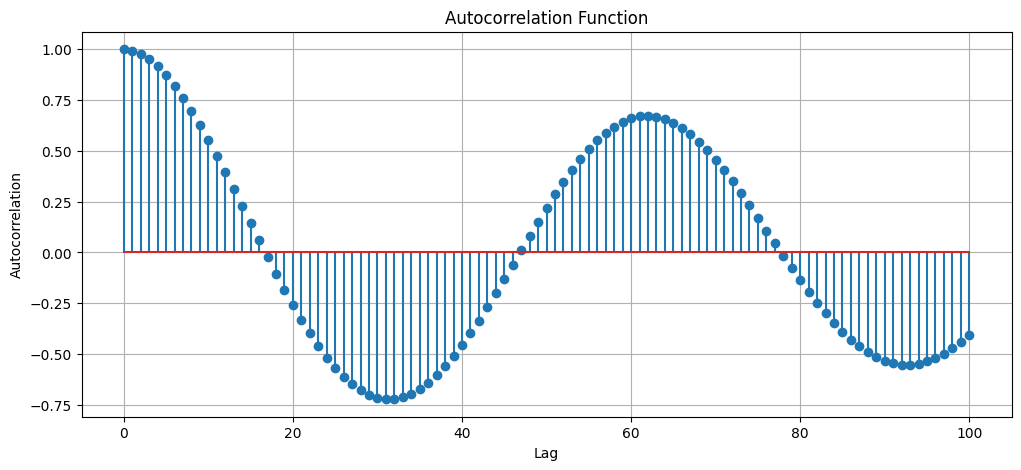

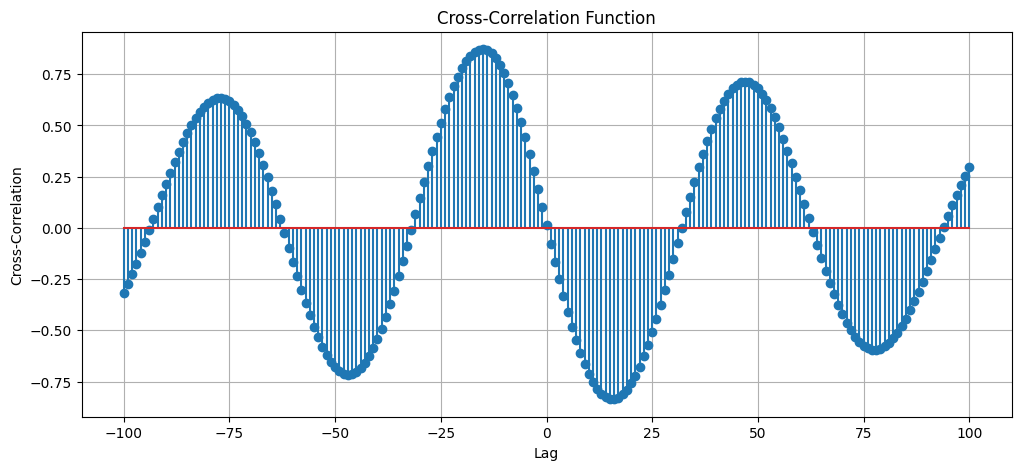

In [3]:
# Calculate auto-correlation on x
lags_x, corr_x = auto_correlation(data_x, 100)

#plot auto-correlation
plot_autocorrelation(lags_x, corr_x)

# Calculate cross-correlation between x and y
cross_loags, cross_corr = cross_correlation(data_x, data_y, 100)

#plot cross-correlation
plot_crosscorrelation(cross_loags, cross_corr)

0.6357894736842105 0.12171216215116905


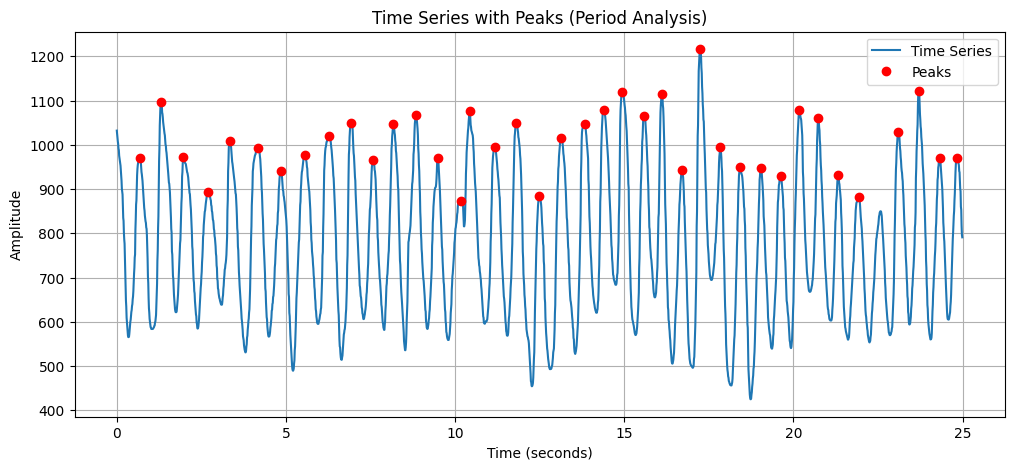

16.789947586206846 98.1497644742441


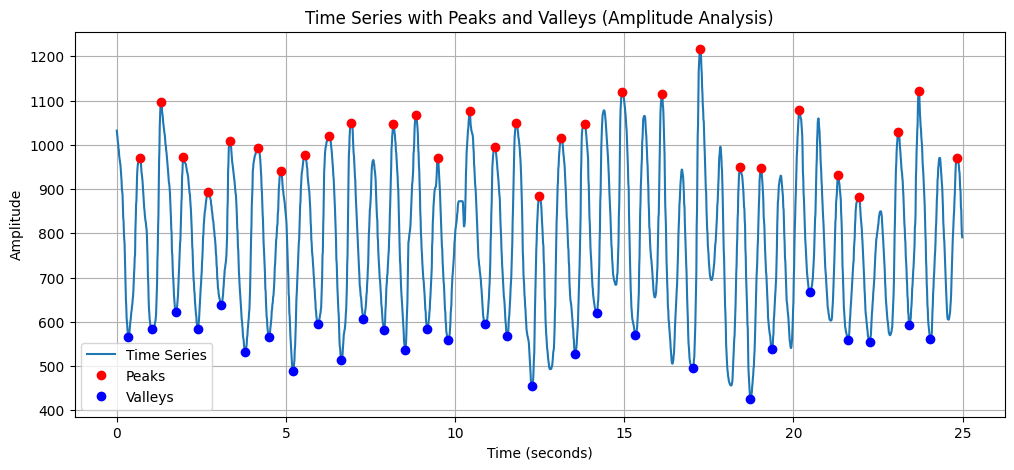

In [4]:

meanPeriod, sdPeriod, peaks, pkLocs = period(data_x, samplerate=100, DistFLT=0.2, AmpFLT=0.2)
print(meanPeriod, sdPeriod)
plot_period(data_x, 100, peaks, pkLocs)

meanAmp, sdAmp, peaks, pkLocs, valleys, vLocs = amplitude(data_x, samplerate=100)
print(meanAmp, sdAmp)
plot_amplitude(data_x, 100, peaks, pkLocs, valleys, vLocs)

Average Coherence (across spectrum): 0.11291847633082697
 Coherence (peak ts1): 0.9684237998697663
 Coherence (peak ts2): 0.9684237998697663
 Coherence (peak freq average): 0.9684237998697663


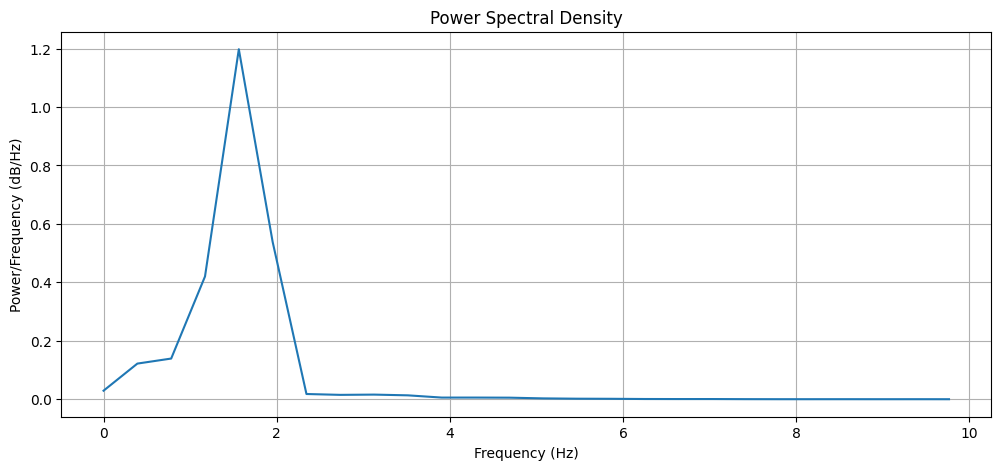

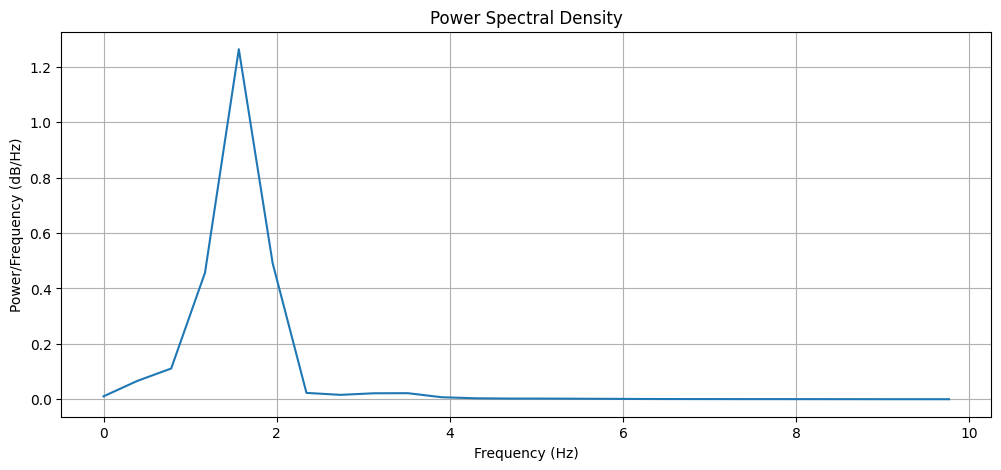

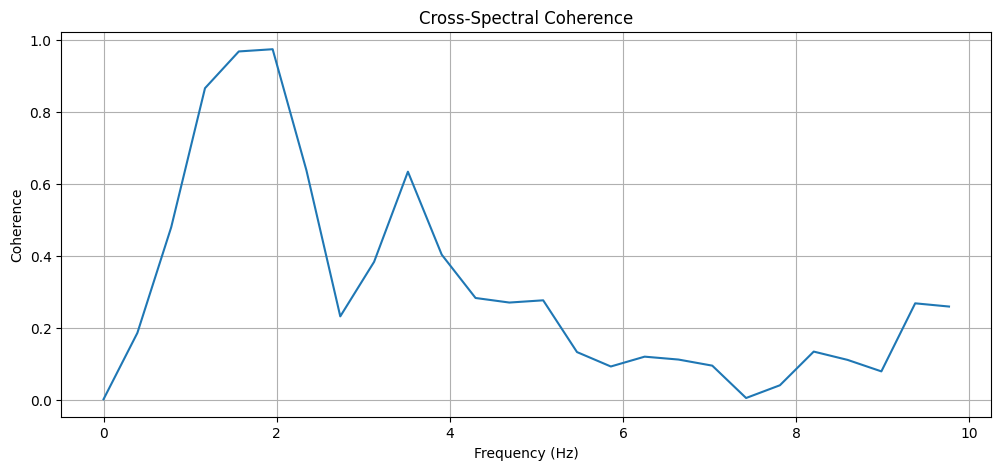

In [5]:

# Example 1D time series data
x = data_x
y = data_y

samplerate = 100
window_size = 256
window_overlap = 0.5

# Perform cross-spectral coherence analysis
cohere_stats, FP1, FP2, cohereFP = cross_spectral_coherence(x, y, samplerate, window_size, window_overlap)

# Print average coherence
print(f'Average Coherence (across spectrum): {cohere_stats[0]}')
print(f' Coherence (peak ts1): {cohere_stats[1]}')
print(f' Coherence (peak ts2): {cohere_stats[2]}')
print(f' Coherence (peak freq average): {cohere_stats[3]}')

# Plot the power spectral densities and coherence
plot_spectral_analysis(FP1, maxFreq=10)
plot_spectral_analysis(FP2, maxFreq=10)
plot_coherence(cohereFP, maxFreq=10)

RP: mean = 2.6723542652822597e-15  sd = 2.7563360898559313   rho = 0.9776


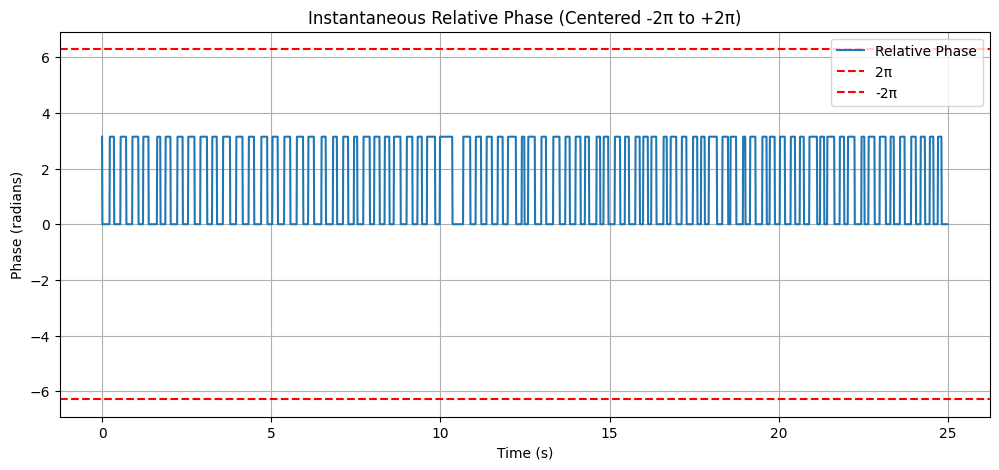

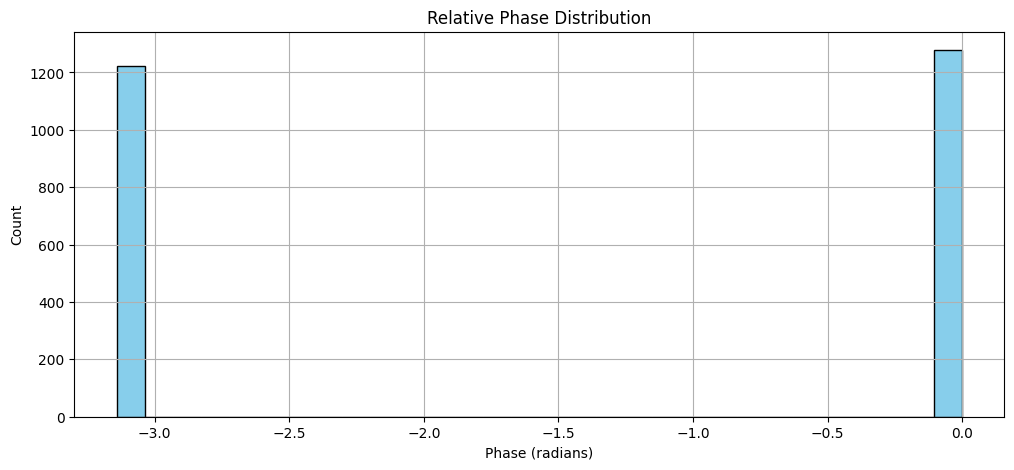

ValueError: `x` must be a 1-D array

In [6]:
# Example usage
x1 = data_x
x2 = data_y
samplerate = 100  # 100 Hz sampling rate

# Perform synchrony analysis and plot results
meanRP, sdRP, rvRP, radians = irp(x1, x2)
print(f'RP: mean = {meanRP}  sd = {sdRP}   rho = {rvRP}')
plot_irp(radians, samplerate, 180)
plot_rp_distribution(radians)

meanRP, sdRP, rvRP, radians, peaks = drp(x1, x2, samplerate)
print(f'RP: mean = {meanRP}  sd = {sdRP}   rho = {rvRP}')
plot_drp(radians, samplerate)
plot_rp_distribution(radians, peaks) 

return_plot(radians, samplerate)